<a href="https://colab.research.google.com/github/Pacifier25/ZTM-Tensorflow-course/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Classification with Neural Networks in TensorFlow

In this notebook we are going to write neural network of classification problem

A classification problem involves predicting whether something is one thing or another.

A few types of classification problem:

* Binary Classification
* Multiclass Classification
* Multilabel Classification

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X,Y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# See the first 10 labels
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1],"label":Y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


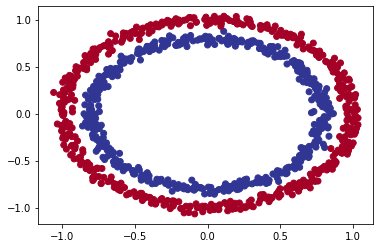

In [ ]:
# Visualise the plot 
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.RdYlBu);

In [ ]:
# Check shapes of features and labels
X.shape,Y.shape

((1000, 2), (1000,))

In [ ]:
# How many are we working 
len(X), len(Y)

(1000, 1000)

In [ ]:
# View first examples of features and labels
X[5],Y[5]

(array([-0.47964637,  0.67643477]), 1)

# Steps in modelling

* **Creating a model** - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).

* **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

* **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

* **Evaluate**

* **Tweak**

In [ ]:
# Set the random seed

tf.random.set_seed(42)

# 1.Create the model using sequential API
model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3.Fit the model
model_1.fit(X,Y,epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


In [ ]:
model_1.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5090


[0.6934750080108643, 0.5090000033378601]

In [ ]:
model_1.fit(X,Y,epochs = 200,verbose = 0)
model_1.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working on binary classification problem and our model is getting around 50% accuaracy it's performing as if it's guessing

So let's step up the thing


In [ ]:
# Set the random seed

tf.random.set_seed(42)

# 1.Create the model using sequential API
model_2 = tf.keras.Sequential([
              tf.keras.layers.Dense(10),
              tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3.Fit the model
model_2.fit(X,Y,epochs = 100,verbose = 0)

In [ ]:
model_2.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5000


[0.694255530834198, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

* **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

* **Compiling a model** - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.

* **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X, Y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_3.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [ ]:
import numpy as np
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


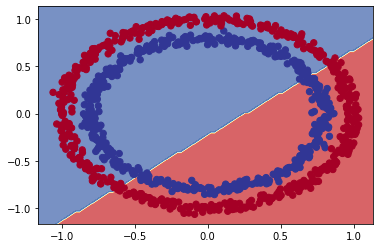

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3,X,Y)

In [ ]:
# set the random seed 
tf.random.set_seed(42)

# Create regression data
X_regression = np.arange(0,1000,5)
Y_regression = np.arange(100,1100,5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
Y_reg_train = Y_regression[:150]
Y_reg_test = Y_regression[150:]



In [ ]:
# Setup random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
              tf.keras.layers.Dense(100),
              tf.keras.layers.Dense(10),
              tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["mae"])

model_3.fit(X_reg_train, Y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 269.0470 - mae: 269.0470
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

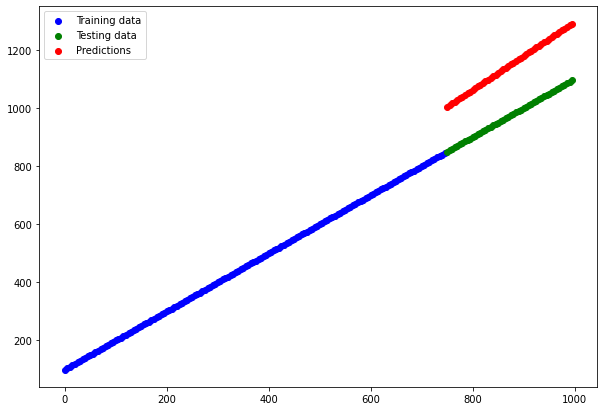

In [ ]:
# Make predictions with our trained model
Y_reg_preds = model_3.predict(Y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, Y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, Y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, Y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

# The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
           tf.keras.layers.Dense(1,activation = tf.keras.activations.linear),
])

# Compile the model
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

# Fit the model
history = model_4.fit(X,Y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

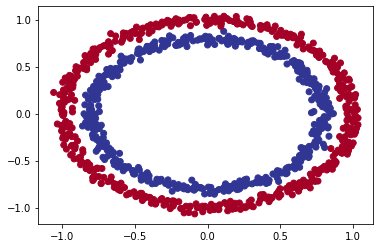

In [ ]:
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.RdYlBu)


doing binary classifcation...


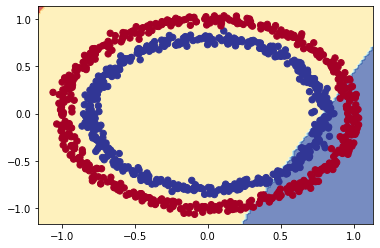

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model = model_4,
                       X = X,
                       y = Y)

Let's build our first neural network with a non-linear activation

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_5 =  tf.keras.Sequential([
             tf.keras.layers.Dense(1,activation = tf.keras.activations.relu),
             tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history = model_5.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.3881 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4914 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4194 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2703 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2634 - accuracy: 0.4301
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1211 - accuracy: 0.4480
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1487 - accuracy: 0.4294
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0766 - accuracy: 0.4462
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0989 - accuracy: 0.4236
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0058 - accuracy: 0.4796
Epoch 11/

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create model
model_6 = tf.keras.Sequential([
            tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
            tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
            tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history = model_6.fit(X,Y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, Y)


32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classifcation...


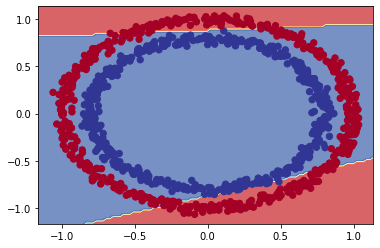

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, Y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
            tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
            tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
            tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])

# Compile the model
model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# Fit the model
model_7.fit(X,Y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

In [ ]:
# Evaluate our model
model_7.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480037093162537, 0.9909999966621399]

doing binary classifcation...


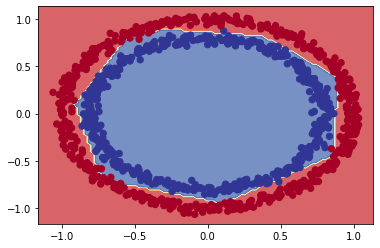

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, Y)

🤔 **Question**: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

🔑 **Note**: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

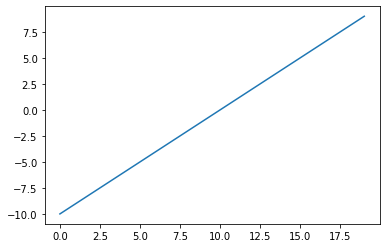

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Sigmoid - 
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

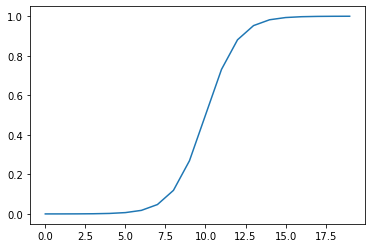

In [ ]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A))

In [ ]:
# ReLU-
def relu(x):
  return tf.maximum(0,x)

relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

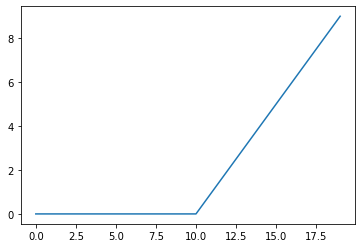

In [ ]:
plt.plot(relu(A))

In [ ]:
# Linear - 
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and improving our classification model

In [ ]:
# How many examples are in the whole dataset?
len(X)

1000

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size = 0.2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, Y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5467
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5263
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6771 - accuracy: 0.5252
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.5630
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.5676
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.6011
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.5846
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5669
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.6039
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6284 - accuracy: 0.6275
Epoch 11/25
25/25 [

In [ ]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_8.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9950


[0.07539377361536026, 0.9950000047683716]

doing binary classifcation...
doing binary classifcation...


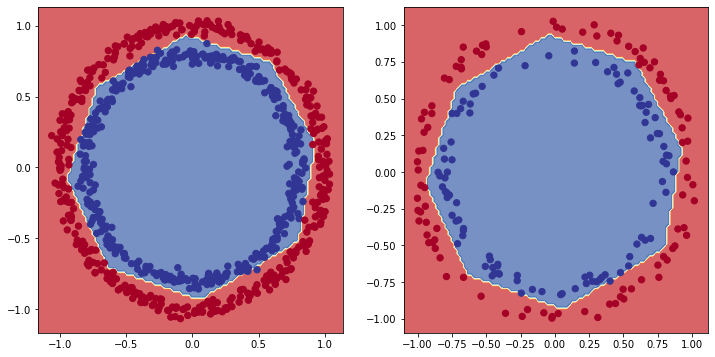

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=Y_train)
plt.subplot(1, 2, 2)
#plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=Y_test)
plt.show()

# Plot the loss curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.685839,0.54250
1,0.680777,0.54625
2,0.673092,0.55125
3,0.668324,0.57000
4,0.662265,0.56125
5,0.656183,0.58375
6,0.650772,0.58750
7,0.647788,0.59500
8,0.642930,0.59750
9,0.630595,0.62125


Text(0.5, 1.0, 'Model_8 training curve')

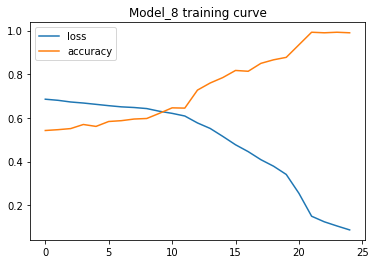

In [ ]:
import matplotlib.pyplot as plt
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curve")

🔑 **Note**: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

# Finding the best learning rate

To find the ideal learning rate(the learning rate where the loss decreases the most during training) we are going to use the following steps:

* A learning rate **callback** - You can think of a callback as an extra piece of functionality you can add to your model while its training.

* Another model (we could use the same ones as above, we we're practicing building models here).

* A modified loss curves plot.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model
model_9 = tf.keras.Sequential([
           tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
           tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
           tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])
# Compile the model
model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history = model_9.fit(X_train,Y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5236
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7014 - accuracy: 0.4808
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5003
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4961
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5298
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5094
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.4976
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5142
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5008
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.4929
Epoch 11/

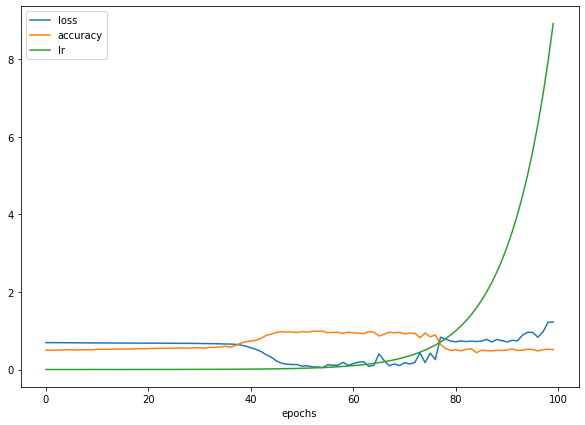

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

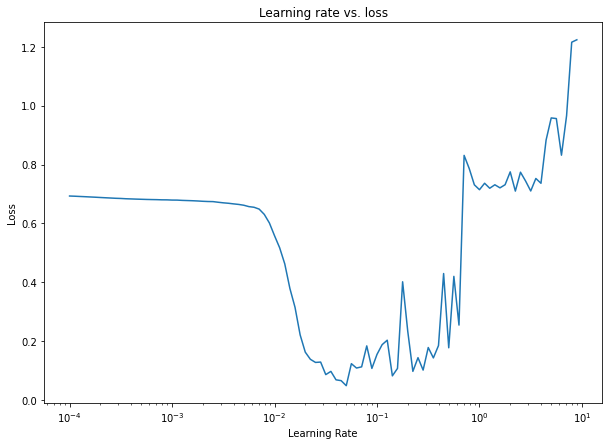

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model 
model_10 = tf.keras.Sequential([
              tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
              tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
              tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])

model_10.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(lr = 0.02),
                 metrics = ["accuracy"])

model_10.fit(X_train,Y_train,epochs = 20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5370
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5463
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5343
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5922
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.6421
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7370
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.7184
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.8231
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8272
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8551
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9900


[0.03962019085884094, 0.9900000095367432]

In [ ]:
model_8.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9950


[0.07539377361536026, 0.9950000047683716]

doing binary classifcation...
doing binary classifcation...


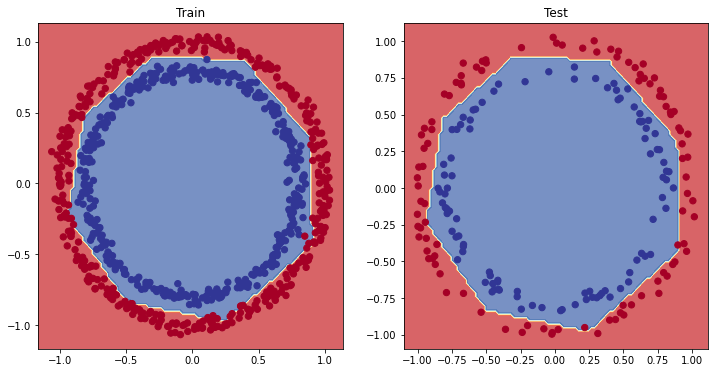

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X = X_train,y = Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X = X_test,y = Y_test)
plt.show()

# More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [ ]:
# Check the accuracy of our model

loss,accuracy = model_10.evaluate(X_test,Y_test)
print(f"Model loss on test set {loss}")
print(f"Model accuracy on test set {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9900
Model loss on test set 0.03962019085884094
Model accuracy on test set 99.00%


How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make prediction
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix( Y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

In [ ]:
Y_test[:10]

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
y_preds[:10]

array([[9.8698306e-01],
       [9.1698766e-04],
       [9.9543774e-01],
       [9.7896516e-01],
       [1.3969824e-01],
       [7.4328232e-01],
       [9.9804032e-01],
       [1.6823083e-02],
       [9.9399996e-01],
       [9.9685311e-01]], dtype=float32)

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

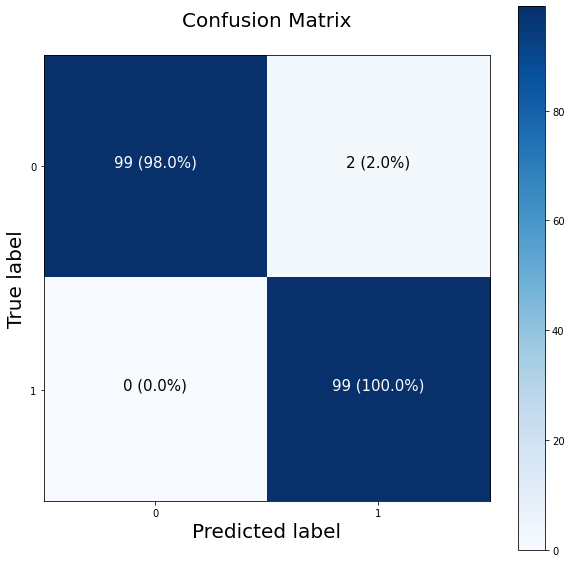

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb

import itertools 

figsize = (10,10)

# Create confusion matrix 
cm = confusion_matrix(Y_test,tf.round(y_preds))
cm_norm = cm.astype("float") /cm.sum(axis = 1)[:,np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig,ax = plt.subplots(figsize = figsize)
# Create a matrix plot
cax = ax.matshow(cm,cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.label.set_size(20)
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.


# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as multi-class classification

* This means if you have 3 different classes,it's multiclass classification

* It also means if you have 100 different classes, it's multiclass classification

To practice multiclass classification, we are going to build a neural network to classify images of different items of clothes 

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training Sample :\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training Sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

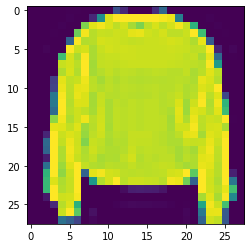

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

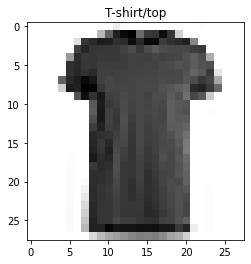

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

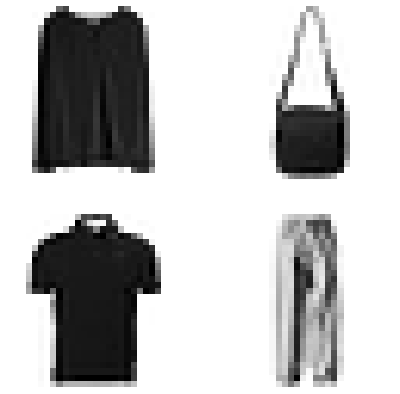

In [ ]:
# Plot multiple random images of fashion MNIST
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap = plt.cm.binary)
  plt.axis(False)

# Building a multiclassification model

For our multiclassification model we can use a similar architecture to our binary classifier, however we are going to have a tweak few things:

* Input shape = 28 x 28(the shape of one image)
* Output shape = 10(one per class of clothing)
* Loss function = tf.keras.losses,Categoricalcrossentropy()
  * If your labels are one hot encoded use Categoricalcrossentropy(test_data)
  * If your labels are integer form use sparsecategoricalentropy(test_data)
* Output layer acrivation = Softmax(not sigmoid)

In [ ]:
tf.one_hot(train_labels[:10],depth = 10),  train_labels[:10]

(<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>,
 array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8))

In [ ]:
# set the random seed
tf.random.set_seed

# Create the model
model_11 = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape = (28,28)),  # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
              tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
              tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
              tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

non_norm_history = model_11.fit(train_data,
                                 train_labels,
                                 epochs = 10,
                                 validation_data = (test_data,test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.0935 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0952 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

Neural network prefer data to be scaled(or normalized) this means they like to have number in tensor they try to find pattern between 0 & 1

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized let's build a model

model_12 = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape = (28,28)),
              tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
              tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
              tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

norm_history = model_12.fit(train_data_norm,
                             train_labels,
                             epochs = 10,
                             validation_data = (test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6454 - accuracy: 0.4131 - val_loss: 0.8367 - val_accuracy: 0.6707
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7687 - accuracy: 0.7007 - val_loss: 0.6978 - val_accuracy: 0.7354
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6688 - accuracy: 0.7435 - val_loss: 0.6627 - val_accuracy: 0.7529
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6271 - accuracy: 0.7675 - val_loss: 0.6502 - val_accuracy: 0.7569
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5993 - accuracy: 0.7779 - val_loss: 0.6255 - val_accuracy: 0.7714
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5819 - accuracy: 0.7848 - val_loss: 0.6253 - val_accuracy: 0.7679
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5631 - accuracy: 0.7926 - val_loss: 0.6045 - val_accuracy:

**Note**: Neural network tend to prefer data in numerical form as well as scaled/normalized(number between 0 and 1)

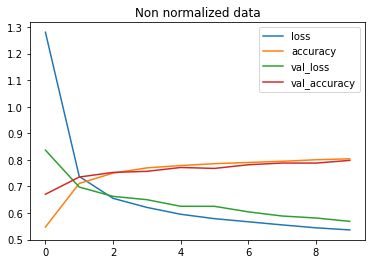

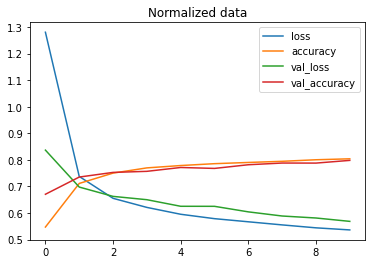

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = "Non normalized data");
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

🔑 **Note**: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape = (28,28)),
              tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
              tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
              tf.keras.layers.Dense(10,activation = tf.keras.activations.sigmoid)
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

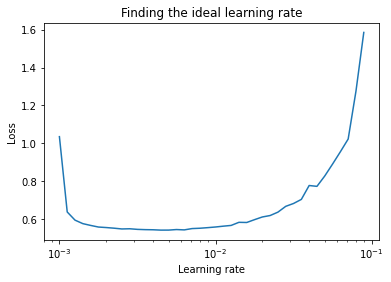

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model
model_14 = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape = (28,28)),
              tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
              tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
              tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])

# Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

# Fit hte model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs = 20,
                          validation_data = (test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

# Evaluate our multi-class classification model 
* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data_norm) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

**Note**: Remember to make prediction on the same kind of data your model was trained on(eg: if your model was trained on normalized data you'll want to make prediction on normalized data)

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import  confusion_matrix

confusion_matrix(y_true = test_labels,
                    y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

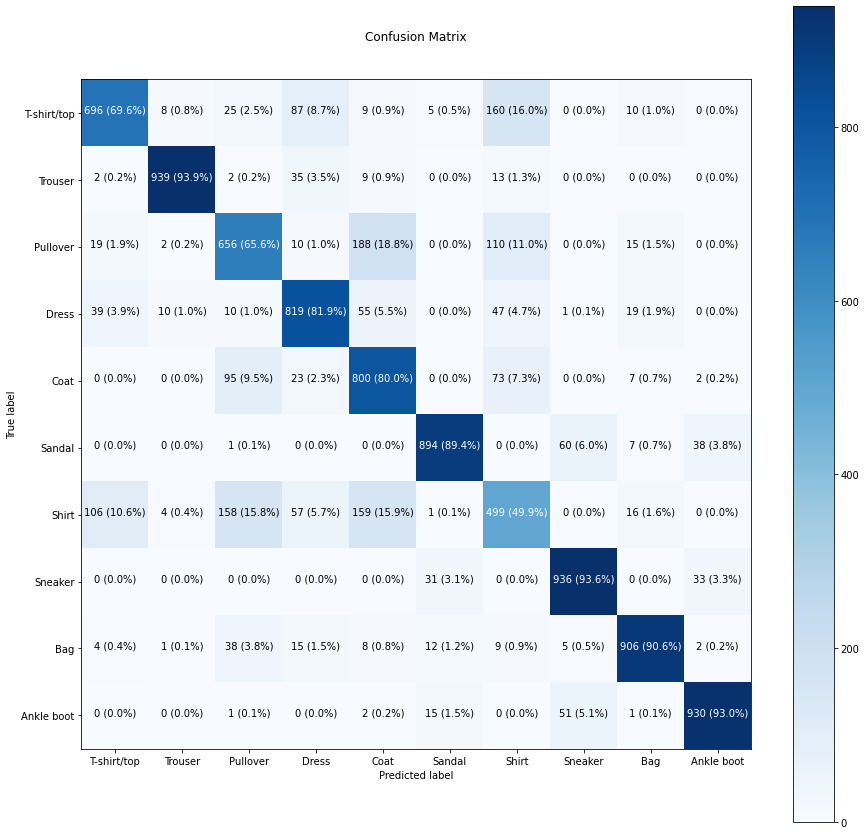

In [ ]:
# Make prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

🔑**Note**: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

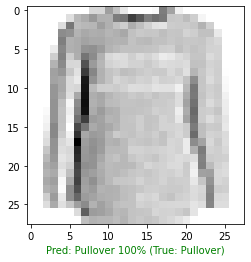

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

# What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.7150263 , -0.06077094, -0.99763054, -1.048431  ],
        [ 0.27732128, -0.47155392, -0.5291646 ,  0.02329262],
        [ 0.775243  ,  0.540276  , -1.1288569 , -0.7426157 ],
        ...,
        [-0.39453438,  0.47628698, -0.22641574,  0.25505954],
        [-0.4051576 ,  0.6181001 ,  0.23928389, -0.5038765 ],
        [ 0.23884599,  0.11606929, -0.12131333,  0.04352435]],
       dtype=float32), (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 2.4485605e-02, -6.1463297e-04, -2.7230164e-01,  8.1124890e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
# Can now calculate the number of paramters in our model
model_14.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_38 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


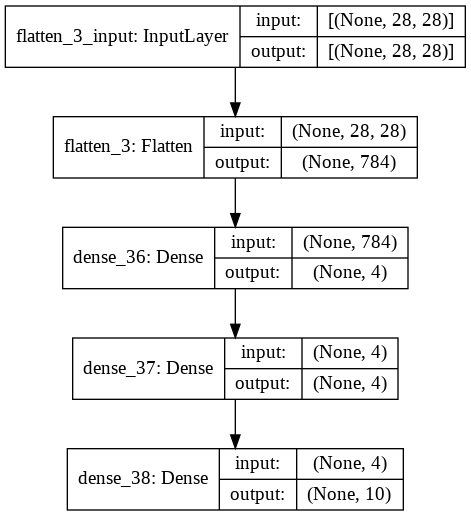

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)